In [4]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

#### INCOMPLETE...

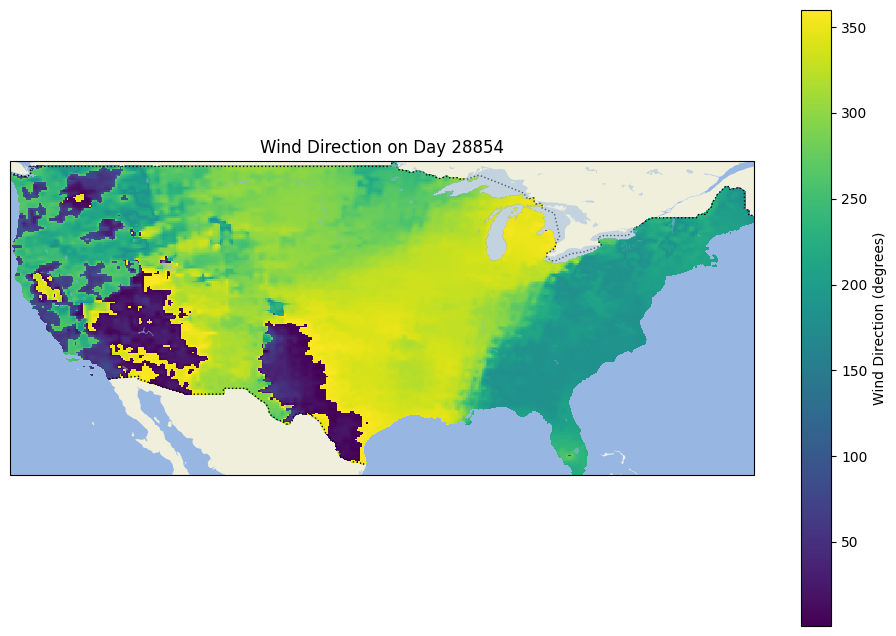

In [5]:
file_path = '../raw/wind_direction/th_1979.nc'
dataset = nc.Dataset(file_path)
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]
days = dataset.variables['day'][:]

day_index = 0
wind_data_day = dataset.variables['wind_from_direction'][day_index, :, :]  # (lat, lon)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([min(lon), max(lon), min(lat), max(lat)], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)

mesh = ax.pcolormesh(lon, lat, wind_data_day, cmap='viridis', shading='auto', transform=ccrs.PlateCarree())
plt.colorbar(mesh, ax=ax, label='Wind Direction (degrees)')

plt.title(f'Wind Direction on Day {int(days[day_index])}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

dataset.close()